<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Load-and-Concatenate-data" data-toc-modified-id="Load-and-Concatenate-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load and Concatenate data</a></span></li><li><span><a href="#Duplicated-Entries" data-toc-modified-id="Duplicated-Entries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Duplicated Entries</a></span></li><li><span><a href="#Country" data-toc-modified-id="Country-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Country</a></span></li></ul></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Missing Values</a></span><ul class="toc-item"><li><span><a href="#Missing-Description" data-toc-modified-id="Missing-Description-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Missing Description</a></span></li><li><span><a href="#Missing-Customer-ID" data-toc-modified-id="Missing-Customer-ID-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Missing Customer ID</a></span></li></ul></li><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Numerical Features</a></span><ul class="toc-item"><li><span><a href="#Price" data-toc-modified-id="Price-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Price</a></span></li><li><span><a href="#Quantity" data-toc-modified-id="Quantity-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Quantity</a></span></li></ul></li><li><span><a href="#Time-Series" data-toc-modified-id="Time-Series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time Series</a></span></li><li><span><a href="#Stock-Code-and-Description" data-toc-modified-id="Stock-Code-and-Description-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stock Code and Description</a></span></li><li><span><a href="#Save-Files" data-toc-modified-id="Save-Files-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Save Files</a></span></li></ul></div>

This [Online Retail II data set](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II) contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta
import missingno as msno
import seaborn as sns

## Load Data

There are two sheets in the original excel file covering two different periods, 12/01/2009 through 12/10/2010, and 12/01/2010 through 12/9/2011.

### Load and Concatenate data

In [2]:
# Load two sheets as a dict of DataFrame
file_path = '/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone3/RawData/online_retail_II.xlsx'
two_sheets = pd.read_excel(file_path, sheet_name=None)

In [3]:
# Concatenate two sheets
retail = pd.concat(two_sheets, ignore_index=True)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [5]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Column Description:

**InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invoice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice**: Unit price. Numeric. Product price per unit in sterling.

**Customer ID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal. The name of the country where a customer resides.

We will check duplicates since there is overlap of the two sheets.

### Duplicated Entries

In [6]:
retail.duplicated().sum()

34335

Totally 32463 entries are duplicated, which will be remove.

In [7]:
# Drop all the duplicates
retail.drop_duplicates(inplace=True)
retail.duplicated().sum()

0

### Country

In [8]:
# Check the top five coutries
retail.Country.value_counts(normalize=True)[:5]

United Kingdom    0.917994
EIRE              0.017102
Germany           0.016785
France            0.013576
Netherlands       0.004973
Name: Country, dtype: float64

The transactions from UK account for the vast majority. For this project, we will focus on UK.

In [9]:
# Keep the transactions from the U.K. only
retail = retail[retail.Country == 'United Kingdom']
retail.Country.unique()

array(['United Kingdom'], dtype=object)

We will remove the country column since it can't provide more information for the following analysis and modeling

In [10]:
# Drop country column
retail.drop('Country', axis=1, inplace=True)
retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID'],
      dtype='object')

## Missing Values

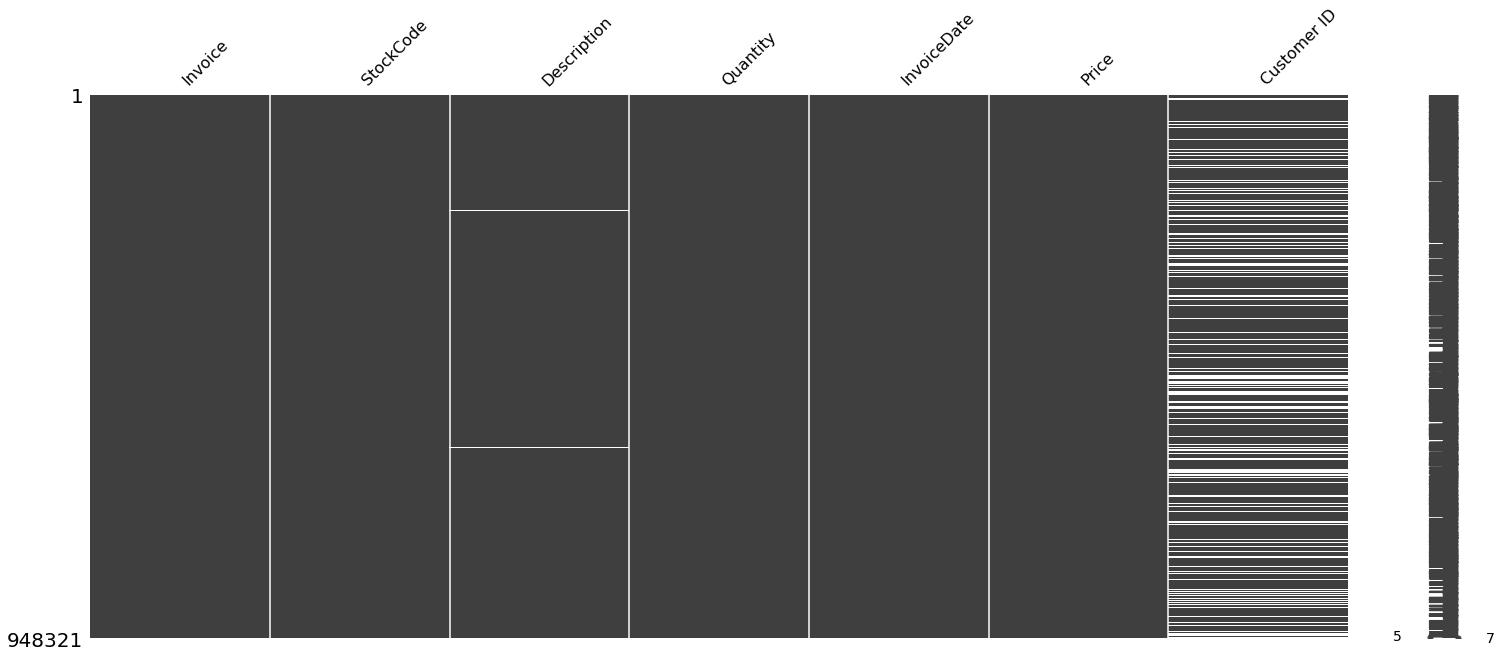

In [11]:
# Missing value distribution
_ = msno.matrix(retail)

In [12]:
def missing_vals(data):
    # Check the number and percentage of missing values
    miss     = data.isnull().sum()
    miss_pct  = data.isnull().sum()/data.shape[0]
    
    miss_pct  = pd.concat([miss, miss_pct], axis =1)
    miss_pct.reset_index(inplace=True)
    miss_cols = miss_pct.rename(columns={'index':'Column Name', 0:'Missings', 1:'Missing_pct'})
    
    miss_cols = miss_cols[miss_cols.iloc[:,1]!=0].sort_values('Missing_pct', ascending=False).round(3)
    miss_cols.reset_index(inplace=True, drop=True)
    
    return miss_cols

miss_loans = missing_vals(retail)
miss_loans

,Column Name,Missings,Missing_pct
0,Customer ID,232206,0.245
1,Description,4275,0.005


### Missing Description

In [13]:
retail[retail.Description.isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN
...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN


Some values look weird, such as the negative values in Quantity and the zero price. Only about 0.5% of the transactions have no description, so we will remove all these entries.

In [14]:
# Remove the entries with missing Description
retail = retail[retail.Description.notna()]
retail.Description.isna().sum()

0

### Missing Customer ID

<div class="burk">
Almost one fourth of the transactions have no Customer ID that is critical to the analysis based on cohort. The distribution of the Customer ID's missing values look random, so temporarily,  we fill missing Customer ID with 0.</div><i class="fa fa-lightbulb-o "></i>

In [16]:
retail['Customer ID'].fillna(0, inplace=True)

In [17]:
retail.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
dtype: int64

As we can see, there's a space between "Customer" and "ID", we will remove the space for convenience.

In [18]:
# Remove space
retail.rename(columns = {'Customer ID': 'CustomerID'}, inplace=True)
retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID'],
      dtype='object')

## Numerical Features

In [19]:
retail[['Quantity', 'Price']].describe()

,Quantity,Price
count,944046.000000,944046.000000
mean,9.096960,4.514302
std,172.168235,125.825481
min,-80995.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.150000
max,80995.000000,38970.000000


Both quantity and price has negative values. Let's check it.

### Price

In [20]:
# Calculate the percentage of the transactions whose price are less than or equal to 0
retail[retail.Price <= 0].shape[0] / retail.shape[0]

0.0018187673058304363

In [21]:
retail[retail.Price <= 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,0.0
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,0.0
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,0.0
3162,489660,35956,lost,-1043,2009-12-01 17:43:00,0.0,0.0
3168,489663,35605A,damages,-117,2009-12-01 18:02:00,0.0,0.0
...,...,...,...,...,...,...,...
1060797,581213,22576,check,-30,2011-12-07 18:38:00,0.0,0.0
1062371,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,0.0
1063965,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,0.0
1063966,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,0.0


Less than 0.2% transactions' price is less than or equal to zero. Moreover, most of the description of these transactions look different from a normal transaction. We will remove all these entries.

In [22]:
# Keep the transactions with price more than 0
retail = retail[retail.Price > 0]
retail.Price.describe()

count    942329.000000
mean          4.690915
std          94.265751
min           0.001000
25%           1.250000
50%           2.100000
75%           4.150000
max       38970.000000
Name: Price, dtype: float64

### Quantity

In [23]:
# Calculate the percentage of the transactions whose quantity are less than or equal to 0
retail[retail.Quantity <= 0].shape[0] / retail.shape[0]

0.01728695604189195

In [24]:
retail[retail.Quantity <= 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
197,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
198,C489459,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
199,C489459,90200E,GREEN SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
200,C489459,90200C,BLUE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0


The Invoice codes of the first and last five entries show that the transactions with negative quantity had been canceled(According to the column description, the code starting with the letter 'c' indicates a cancellation). Here, we will remove the transactions with negative quantity without further exploration since they only account for less than 2% of all the transactions.

In [25]:
# Keep the transactions with quantity more than 0
retail = retail[retail.Quantity > 0]
retail.Quantity.describe()

count    926039.000000
mean          9.921563
std         124.656086
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

## Time Series

In [26]:
retail.InvoiceDate

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067350   2011-12-09 12:31:00
1067351   2011-12-09 12:49:00
1067352   2011-12-09 12:49:00
1067353   2011-12-09 12:49:00
1067354   2011-12-09 12:49:00
Name: InvoiceDate, Length: 926039, dtype: datetime64[ns]

For this project, the detailed time of the transactions is unnecessary, so we keep the date only.

In [27]:
# Keep date only
retail.InvoiceDate = retail.InvoiceDate.dt.date
retail.InvoiceDate

0          2009-12-01
1          2009-12-01
2          2009-12-01
3          2009-12-01
4          2009-12-01
              ...    
1067350    2011-12-09
1067351    2011-12-09
1067352    2011-12-09
1067353    2011-12-09
1067354    2011-12-09
Name: InvoiceDate, Length: 926039, dtype: object

## Stock Code and Description

Stock code and description are both product-level features. Here we separate the whole dataset into two parts, the customer part and product part. The customer part will be used to do cohort analysis, RFM analysis, Customer Life Value calculation and prediction, and customer segmentation. <span class="burk">The product part will be used to do marked basket analysis.</span>

In [28]:
# Build a dataset for customer analysis
retail_c = retail[['Invoice', 'Quantity', 'InvoiceDate', 'Price', 'CustomerID']]
# Build a dataset for product analysis
retail_p = retail[['Invoice', 'StockCode', 'Description']]

## Save Files

In [47]:
retail_c.to_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone3/ProcessedData/retail_c.csv', index=False, date_format='%Y-%m-%d')
retail_p.to_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone3/ProcessedData/retail_p.csv', index=False, date_format='%Y-%m-%d')